# Viewing and mergeing file in pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
customers = pd.read_csv("C:\\Users\\CHANDRASHEKHAR\\Downloads\\amazon_customers.csv")
orders = pd.read_csv("C:\\Users\\CHANDRASHEKHAR\\Downloads\\amazon_orders.csv")
products = pd.read_csv("C:\\Users\\CHANDRASHEKHAR\\Downloads\\amazon_products.csv")
reviews = pd.read_csv("C:\\Users\\CHANDRASHEKHAR\\Downloads\\amazon_reviews.csv")

# Cheaking data data types

In [5]:
# cheaking data types of all tables
# Customers table
print("1.customers data types:")
a = customers.dtypes
print(a)
# Orders table
print("\n2.orders data types:")
b = orders.dtypes
print(b)
# Product table
print("\n3.product data types:")
c= products.dtypes
print(c)
# review table 
print("\n4.reviews data types:")
d = reviews.dtypes
print(d)

1.customers data types:
customer_id          object
name                 object
location             object
registration_date    object
dtype: object

2.orders data types:
order_id        object
customer_id     object
product_id      object
order_date      object
quantity         int64
price          float64
total_price    float64
dtype: object

3.product data types:
product_id       object
product_name     object
category         object
price           float64
dtype: object

4.reviews data types:
review_id      object
product_id     object
customer_id    object
rating          int64
review_text    object
dtype: object


In [6]:
products.drop('price', axis = 1, inplace = True)

# Merging all tables in one table

In [7]:
# Merge customers and orders on 'customer_id'
d1 = pd.merge(customers, orders, on='customer_id', how='inner')
#print(d1.head)

# Merge the resulting dataframe with products on 'product_id'
d2 = pd.merge(d1, products, on=['product_id'] , how='inner')

# Merge the resulting dataframe with reviews, likely on both 'customer_id' and 'product_id'
data = pd.merge(d2, reviews, on=['customer_id', 'product_id'], how='inner')

# Display the columns of the final dataframe
data.head()


,customer_id,name,location,registration_date,order_id,product_id,order_date,quantity,price,total_price,product_name,category,review_id,rating,review_text
0,ebf7a7f2-69ff-4b93-9042-e5fb32fb12bf,Michelle Fuentes,Masonburgh,2022-03-08,b7d1312b-da91-418d-a888-14c2081fea50,5d864c6d-fb42-4856-9bb0-13942ee06b2a,2019-11-02,2,119.708536,239.417072,Significant Customer,Books,e64faff0-7e0b-4315-af32-430bae1751a2,3,Fill rise production allow nothing career spec...
1,d3fbbe70-6583-4966-8ff0-009c867f03f1,Samuel Miles,East Kathleen,2021-03-17,4f6f7cbc-7105-427b-bcea-9c30c73f199a,d0d417a1-2495-4aa5-8788-90273f027665,2022-05-06,2,815.885340,1631.770680,Rule Thousand,Electronics,f61eeeae-b238-4ff6-a888-76a79908f539,1,Also about recognize quickly poor certainly tr...
2,57ad4d16-1877-4d6e-96d5-d8da1ec4a672,Amy Bright,Port Stacey,2024-05-17,c8ea3057-0686-4ec9-bbbe-1a3a03bf6f6c,059a72f1-715d-44fc-8424-e08a14900114,2020-04-18,5,990.982844,4954.914222,Front Decision,Beauty & Personal Care,d73cce76-dcbc-4da9-8b8f-80ac1cec0d7b,5,Well prepare read smile create rich will alone...
3,3a5a8d03-22d1-410d-afd2-c63af9bc4d76,Robert Quinn,Port Kellyton,2021-07-15,ed8bb53b-1a95-4411-9c79-97a5e94c23c8,3bd9d127-2116-4292-a496-20738db8edd6,2023-06-09,2,873.564001,1747.128002,Different Few,Books,4a894232-a40b-41cf-93f1-ec60bf727034,1,Use free little meet play ask.
4,4012c4b4-45de-46c1-87d2-9c17bdaf25b1,Alexander Martin,Danielchester,2020-05-16,8f9e4684-e700-42bd-9b7b-d071ced1a45c,76d28fc3-a6c2-42c8-80c4-65cf1dc073c4,2021-03-08,4,925.739612,3702.958447,Risk Determine,Electronics,f09a9900-f5bf-4300-9325-297db2eb6399,3,Add social organization financial growth laugh...


# data cleaning 

In [8]:
# cheaking null values
data.isnull().sum()

customer_id          0
name                 0
location             0
registration_date    0
order_id             0
product_id           0
order_date           0
quantity             0
price                0
total_price          0
product_name         0
category             0
review_id            0
rating               0
review_text          0
dtype: int64

In [9]:
# cheking duplicates
data.duplicated().sum()

np.int64(0)

# Analysis data using Exploratory data analysis(EDA)

# (A). Univariate analysis:

# Question 2: How does the total sales distribution vary across different regions and product categories?

(i). Top Product(Data Table):
                         total_price
category                            
Toys & Games            12044.086114
Electronics              9620.016813
Beauty & Personal Care   7207.298065
Books                    4581.517827
Home & Kitchen            462.687656

(ii). Top Product(Visulization):


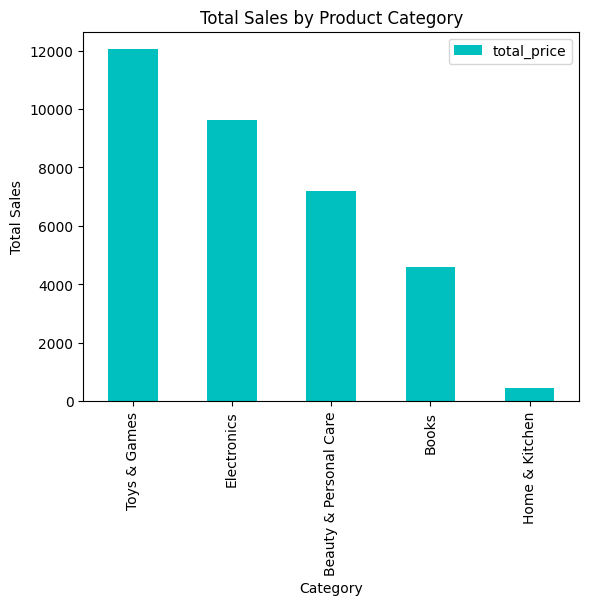

In [18]:
print("(i). Top Product(Data Table):")
# total sales by category
sales_by_category = data.groupby('category').agg({'total_price': 'sum'})

# sort data: to get highest sales from category
sort_category = sales_by_category.sort_values(by = 'total_price', ascending = False)
print(sort_category)


# Visulize data using bar plot:
print("\n(ii). Top Product(Visulization):")
sort_category.plot(kind = 'bar', color = 'c')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# Bivariate Analysis

# Question: How does the total sales vary with the quantity of products ordered?

(i). Order VS Sales(Data Table):
           total_price
quantity              
5         16401.909548
4         12242.525103
2          3618.315754
3          1078.147720
1           574.708350

(ii). Top Product(Visulization):


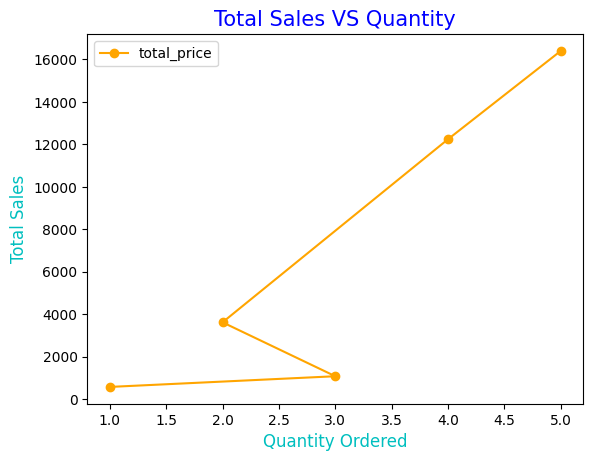

In [20]:
print("(i). Order VS Sales(Data Table):")
# total sales vs quantity
sales_by_quantity = data.groupby('quantity').agg({'total_price':'sum'})
# sort data in desc for top sales quantity
sort_quantity = sales_by_quantity.sort_values(by = 'total_price', ascending = False)
print(sort_quantity)
# Visulize data:
print("\n(ii). Top Product(Visulization):")
sort_quantity.plot(kind = 'line', color = 'orange', marker = 'o')
plt.title('Total Sales VS Quantity', fontsize = 15, color = 'b')
plt.xlabel('Quantity Ordered', fontsize = 12, color = 'c')
plt.ylabel('Total Sales', fontsize = 12, color = 'c')
plt.show()

# Multivariate Analysis

# (Que1.) What are the average monthly sales trends for different product categories?

(i). Monthly Sales By Category(Data Table):
                                   total_price
order_date category                           
2019-11    Books                    239.417072
2020-04    Beauty & Personal Care  4954.914222
2020-05    Electronics              574.708350
2020-07    Electronics             1078.147720
2020-10    Toys & Games            8231.807285
2021-03    Electronics             3702.958447
2021-08    Toys & Games            3812.278829
2021-12    Beauty & Personal Care  2252.383843
2022-05    Electronics             1631.770680
2023-06    Books                   1747.128002
2023-08    Electronics             2632.431617
           Home & Kitchen           462.687656
2023-12    Books                    255.684251
2024-04    Books                   2339.288502

(ii). Monthly Sales By Category(Visulization):


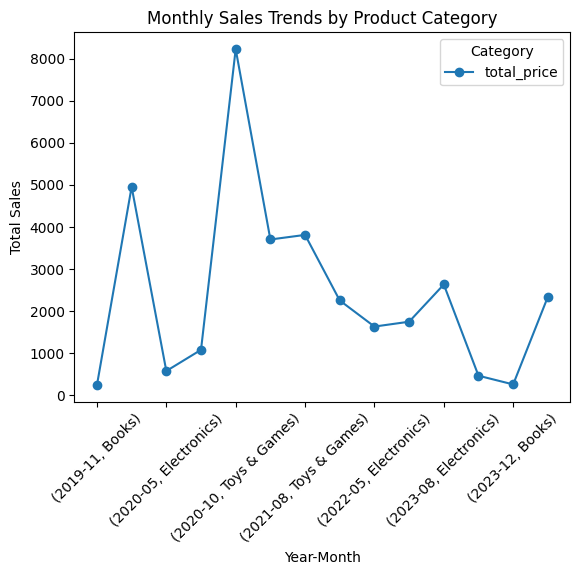

In [22]:
print("(i). Monthly Sales By Category(Data Table):")
# Convert order_date to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Group by month and category, then sum total sales
monthly_sales_by_category = data.groupby([data['order_date'].dt.to_period('M'), 'category']).agg({'total_price':'sum'})
print(monthly_sales_by_category)


# Plot
print("\n(ii). Monthly Sales By Category(Visulization):")
monthly_sales_by_category.plot(kind='line', marker = 'o')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

# (Que2). How does the total sales distribution vary across different regions and product categories?

(i). Sales by Region and Product Category(Data Table):
                                         total_price
category               location                     
Beauty & Personal Care Lake Brianmouth   2252.383843
                       Port Stacey       4954.914222
Books                  Johntown          2339.288502
                       Masonburgh         239.417072
                       North David        255.684251
                       Port Kellyton     1747.128002
Electronics            Campbellton        574.708350
                       Danielchester     3702.958447
                       East Jonathan     1078.147720
                       East Kathleen     1631.770680
                       Whitneymouth      2632.431617
Home & Kitchen         Lesterview         462.687656
Toys & Games           Kirkmouth         3812.278829
                       Lake Sierraville  3485.206656
                       Williamsview      4746.600629

(ii). Sales by Region and Product Category(

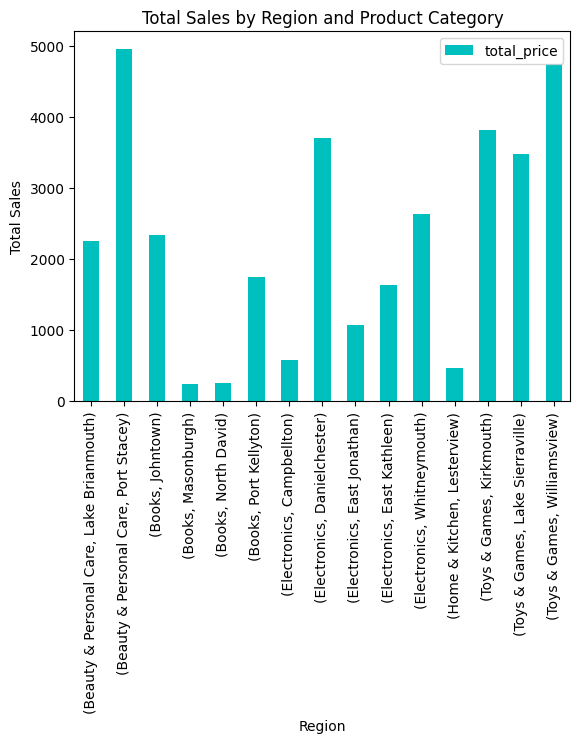

In [26]:
print("(i). Sales by Region and Product Category(Data Table):")
# cheak sales by rigion and category
sales_by_region_category = data.groupby(['category', 'location']).agg({'total_price':'sum'})
print(sales_by_region_category)


# data visulization using bar chart:
print("\n(ii). Sales by Region and Product Category(Visulization):")
sales_by_region_category.plot(kind = 'bar', stacked = True, color = 'c')
plt.title('Total Sales by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Time Series Analysis

# Question 1: What are the overall monthly sales trends over the last year?

(i). Monthly Sales(Data Table):
            total_price
order_date             
2019-11      239.417072
2020-04     4954.914222
2020-05      574.708350
2020-07     1078.147720
2020-10     8231.807285
2021-03     3702.958447
2021-08     3812.278829
2021-12     2252.383843
2022-05     1631.770680
2023-06     1747.128002
2023-08     3095.119273
2023-12      255.684251
2024-04     2339.288502

(ii). Monthly Sales(Visulization):


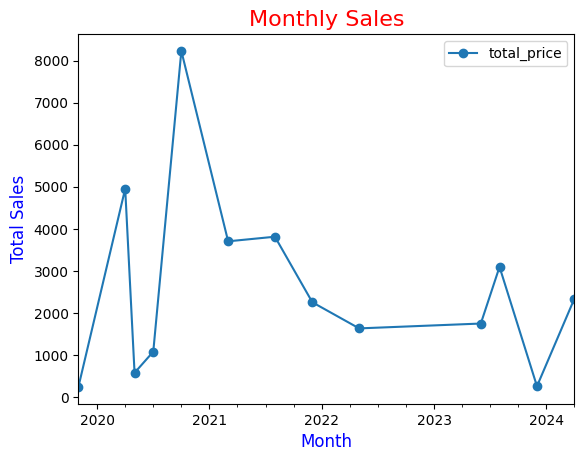

In [24]:
print("(i). Monthly Sales(Data Table):")
# Sales over month:
monthly_sales = data.groupby(data['order_date'].dt.to_period('M')).agg({'total_price':'sum'})
print(monthly_sales)

# Visulization:
print("\n(ii). Monthly Sales(Visulization):")
monthly_sales.plot(kind = 'line', marker = 'o')
plt.title('Monthly Sales', fontsize = 16, color = 'red')
plt.xlabel('Month', fontsize = 12, color = 'blue')
plt.ylabel('Total Sales', fontsize = 12, color = 'blue')
plt.show()

# Question 2: What is the year-over-year growth rate of total sales?

(i). Anual Growth(Data Table):
             total_price
order_date              
2019          239.417072
2020        14839.577577
2021         9767.621118
2022         1631.770680
2023         5097.931526
2024         2339.288502

(ii). Anual Growth(Visulization):


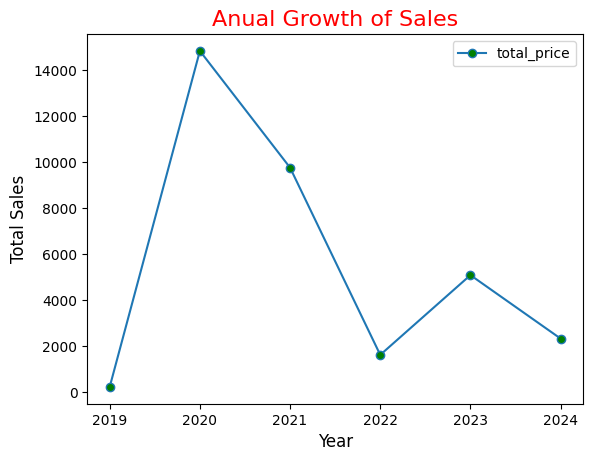

In [25]:
print("(i). Anual Growth(Data Table):")
# Finding anual growth of the sales
anual_growth = data.groupby(data['order_date'].dt.year).agg({'total_price':'sum'})
print(anual_growth)

# Visulization of anual growth:
print("\n(ii). Anual Growth(Visulization):")
anual_growth.plot(marker = 'o', markerfacecolor='green')
plt.title('Anual Growth of Sales', fontsize = 16, color = 'red')
plt.xlabel('Year', fontsize = 12, color = 'black')
plt.ylabel('Total Sales', fontsize = 12, color = 'black')
plt.show()